In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
import math
import numpy as np
import pylab as plt
from scipy.special import gamma
import xraylib

In [19]:
def func(x):
    b=1.0 # константа, узнается из эксперимента
    z=29.0 # порядковый номер элемента анода(медь)
    v=40.0 # напряжение на в трубке
    lm=12.4/1.6/v #минимальная длинна волны
    res = b*z*v*v/x/x*(1/lm-1/x)
    return res

In [40]:
v = 40 # напряжение на в трубке
lm=12.4/1.6/v #минимальная длинна волны
x=np.arange(lm, 2, 0.01) # массив длинн волн

In [41]:
def lor(x, l0): # рассчет спектральной лоренцовской линии
    v = 20 # напряжение на в трубке
    I = 10 # сила тока на аноде
    vk = 7 # ионизтрующий потенциал К-оболочки
    i = I*sqrt((v-vk)*(v-vk)*(v-vk)) # интенсивность характерестического излучения
    g = 6.62*3/1.6/1000 # полуширина лоренцовской линии
    res2 = i*g/2/3.14/((x-l0)*(x-l0) + (g/2)*(g/2)) # лоренцова линия
    return res2

In [55]:
def absorb(y, x): #поглощение Cu-1mm
    r = 5.32873
    l = 0.001
    c = 3.0
    h = 6.62
    e = 12.4/x
    A=[]
    for ae in e:
        A.append(exp(-xraylib.CS_Total_CP("Cu", ae)*r*l))
    return y*A

In [56]:
def det(x):
    return x/2

In [57]:
def absorb1(y, x): #поглощение Al-1mm
    r = 5.32873
    l = 0.001
    c = 3.0
    h = 6.62
    e = 12.4/x
    A=[]
    for ae in e:
        A.append(exp(-xraylib.CS_Total_CP("Al", ae)*r*l))
    return y*A

In [58]:
def absorb2(y, x): #поглощение Сu-0.5mm
    r = 5.32873
    l = 0.0005
    c = 3.0
    h = 6.62
    e = 12.4/x
    A=[]
    for ae in e:
        A.append(exp(-xraylib.CS_Total_CP("Cu", ae)*r*l))
    return y*A

In [59]:
def absorb3(y, x): #поглощение Al-0.5mm
    r = 5.32873
    l = 0.0005
    c = 3.0
    h = 6.62
    e = 12.4/x
    A=[]
    for ae in e:
        A.append(exp(-xraylib.CS_Total_CP("Al", ae)*r*l))
    return y*A

In [60]:
y = (func(x)+lor(x, 6.62*3/1.6/7.882)+lor(x, 6.62*3/1.6/8.027)+lor(x, 6.62*3/1.6/8.047)+lor(x, 6.62*3/1.6/8.905))*det(x) # полный спектр

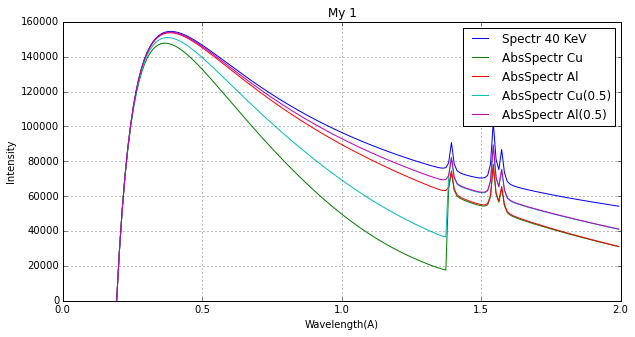

In [61]:
plt.figure(figsize=(10,5))
plt.plot(x,y, label='Spectr 40 KeV')
plt.plot(x, absorb(y, x), label='AbsSpectr Cu')
plt.plot(x, absorb1(y, x), label='AbsSpectr Al')
plt.plot(x, absorb2(y, x), label='AbsSpectr Cu(0.5)')
plt.plot(x, absorb3(y, x), label='AbsSpectr Al(0.5)')
plt.grid(True)
plt.legend(loc=0)
plt.title('My 1')
plt.xlabel('Wavelength(A)')
plt.ylabel('Intensity')

In [38]:
def mu(x): #коэффициент поглощения
    c = 3.0
    h = 6.62
    e = 12.4/x 
    A=[]
    for ae in e:
        A.append(xraylib.CS_Total_CP("H2O", ae))
    return A

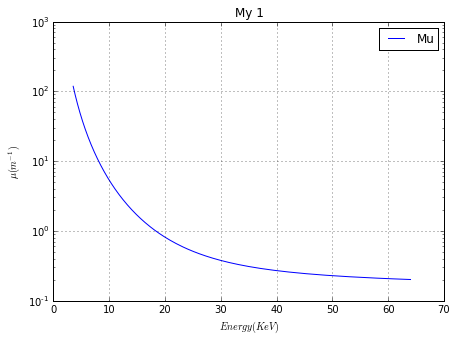

In [39]:
c = 3.0 #построение зависимости массового коэффициента поглащения от энергии  
h = 6.62
e = 12.4/x
plt.figure(figsize=(7,5))
plt.semilogy(e, mu(x), label='Mu')
plt.grid(True)
plt.legend(loc=0)
plt.title('My 1')
plt.xlabel('$Energy(KeV)$')
plt.ylabel('$\mu(m^{-1})$')